<a href="https://colab.research.google.com/github/zelal-Eizaldeen/deeplearning_course/blob/main/4_1CIFAR_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Let's now introduce the **CIFAR-10** dataset. In this lesson, we will discuss **image classification** using a network known as **a convolutional neural network, or CNN**. In order to do that, we will use the CIFAR-10 dataset.

# CIFAR Dataset

This data set is similar to MNIST. It contains **50,000 training images and 10,000 test images**. These images are **divided into 10 classes**, just like the MNIST digits. But instead of digits, **these classes are different type of objects like airplane, automobile, bir**d, and so on, and the images are in color.

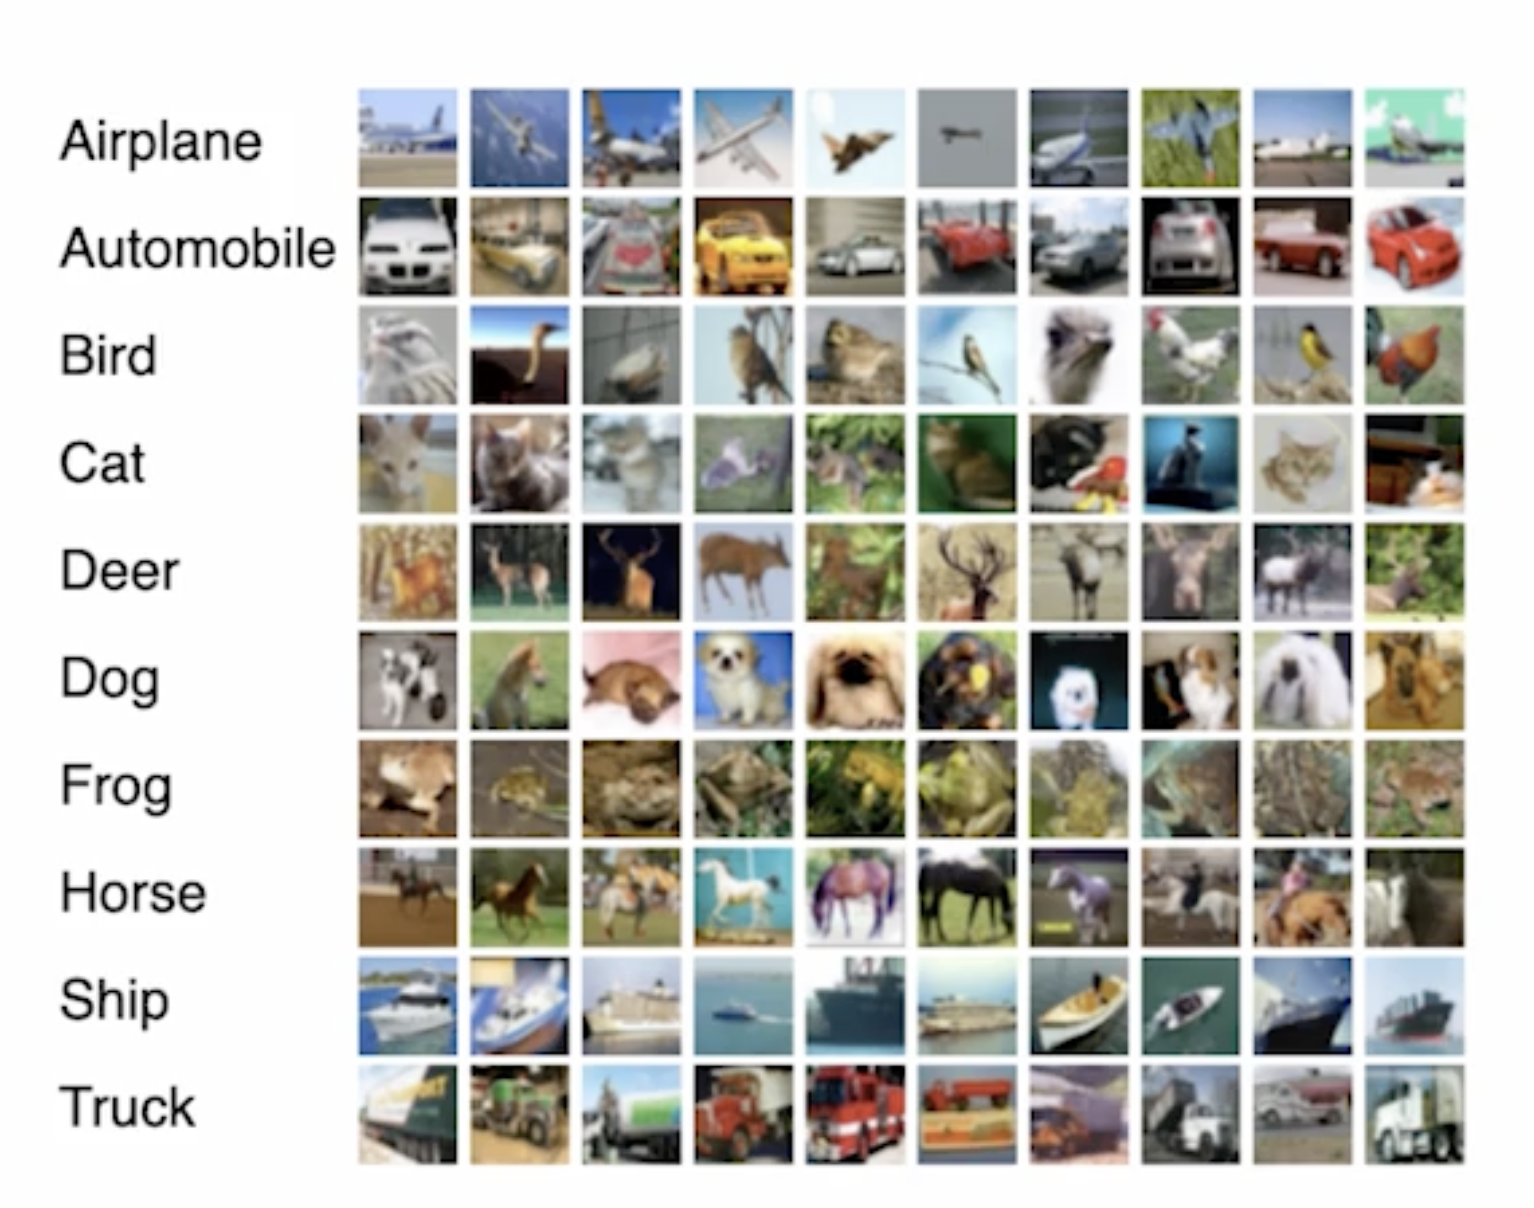

Let's look at one of the images. This is an example from an image in the ship category. Each image is 32 by 32 pixels. These are color images. Therefore, each pixel will be represented by **3 x 8 bits instead of just 8 bits in MNIST**. These three groups of eight bits represent the three color channels, RGB, so it describes the content of red, green, and blue in the image

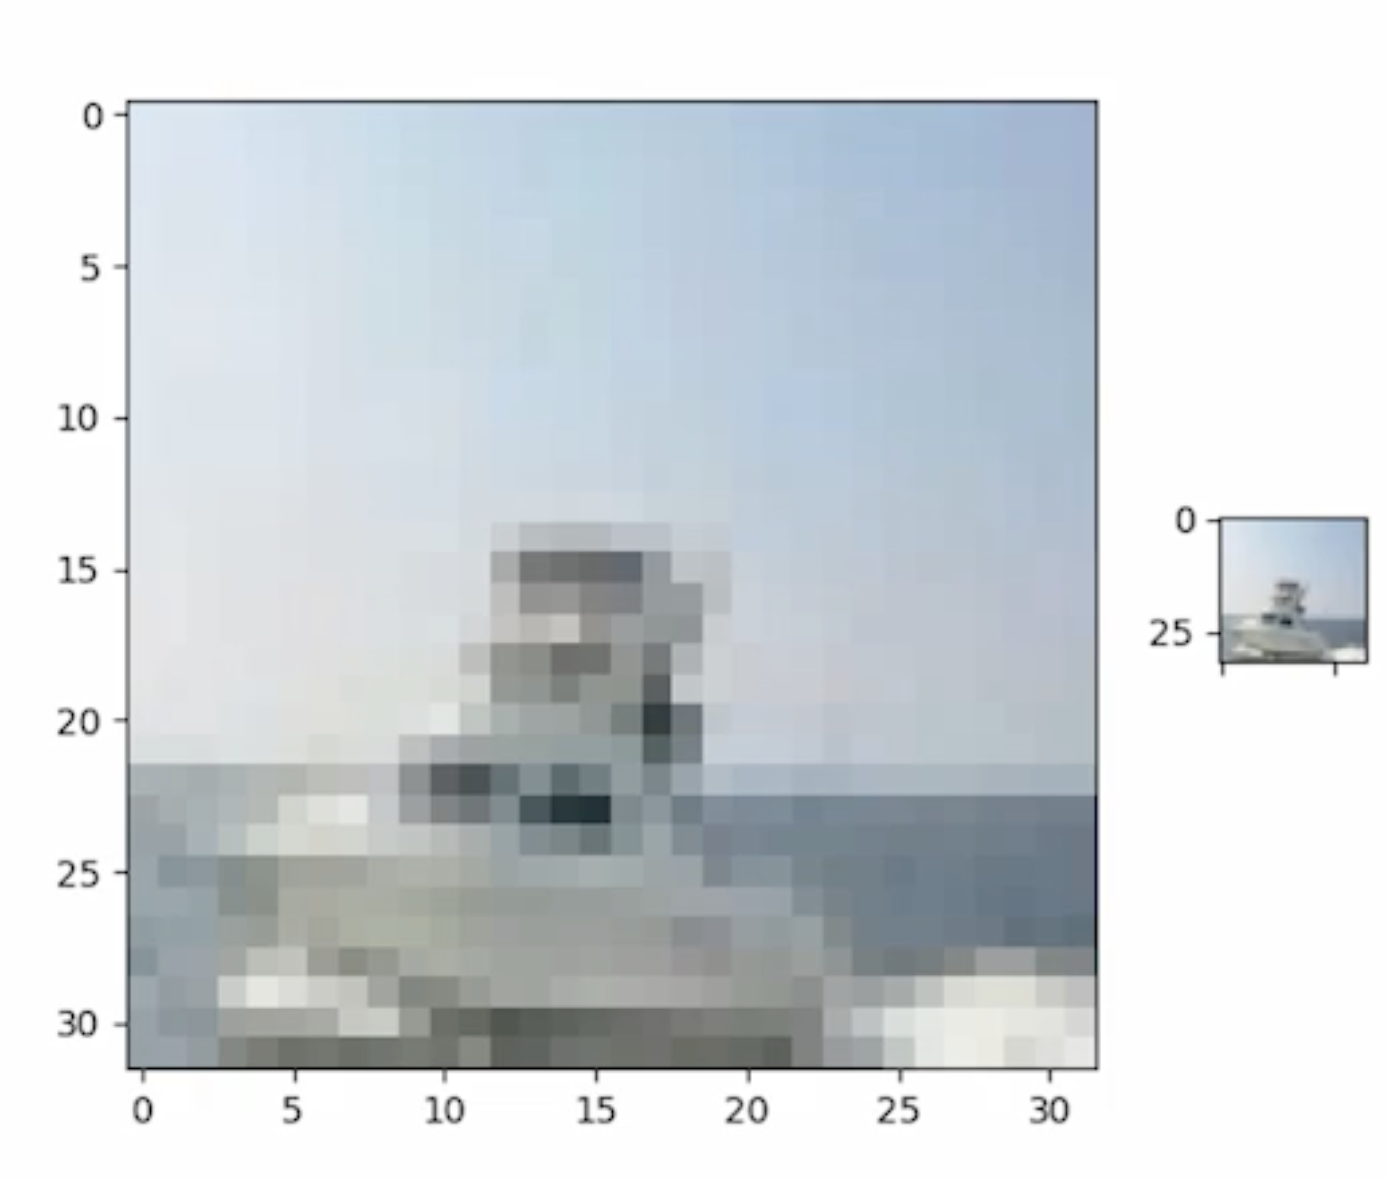

Let's look at an example of how to accessing this dataset in the TensorFlow deep learning framework. We jsut call the keras.datasets.cifar10 function and then we call load_data to load both the train and test images, as well as their associated labels.


This code snippet shows how we can print the label for image number 100. We then also plot this image.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Category:  [8]


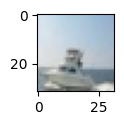

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load dataset.
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images,
    test_labels) = cifar_dataset.load_data()

print("Category: ", train_labels[100])
plt.figure(figsize=(1, 1))
plt.imshow(train_images[100])
plt.show()

 you see how it print out the shape of the train labels array. And we see that it has a shape of 50,000 by one.

So there are 50,000 labels, each label being a single digit describing which category the image belongs to.

In [ ]:
train_labels.shape

(50000, 1)

We can also print out the shape of the train images array itself, and we see that it's 50,000 by 32 by 32 by three. So we have 50,000 images, each image being 32 by 32 pixels, and each pixel being three bytes. And those three bytes represent the R,G, and B values, red, green, and blue.

In [ ]:
train_images.shape

(50000, 32, 32, 3)

We then print the pixel in the upper left corner with the train images 100, zero, zero. So the **zero, zero represents the pixel in the upper left corner.** And we see that it consists of an array of three values with the RGB values of **213, 229, and 242.**

In [ ]:
train_images[100][0][0]

array([213, 229, 242], dtype=uint8)

Let's now look at the same thing using a different deep learning framework, namely **PyTorch**.

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

We load the dataset. This is a little bit different than in TensorFlow because **we first convert this to a tensor**.

This has to do with PyTorch has its own data type for tensors instead of working directly with NumPy arrays. We also use something known as a **data loader** that is used when you load data in PyTorch.

In [ ]:
# Load training dataset into a single batch.
transform = transforms.Compose([transforms.ToTensor()])
trainset = CIFAR10(root='./pt_data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False)
data = next(iter(trainloader))

100%|██████████| 170M/170M [00:02<00:00, 77.5MB/s]


In order to explore these images with Python, we need to now first convert it back NumPy arrays. We can then print the category for image number 100, and then show the image again.

In [ ]:
# Convert to numpy arrays of correct shape for plotting.
train_images = data[0].numpy()
train_images = np.moveaxis(train_images, 1, 3)
train_labels = data[1].numpy()

Category:  8


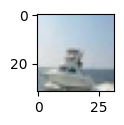

In [ ]:
print('Category: ', train_labels[100])
plt.figure(figsize=(1, 1))
plt.imshow(train_images[100])
plt.show()